In [1]:
import utils
import analyses_utils as an

import pandas as pd
import matplotlib.pyplot as plt

# PDPT

## Paper

In [11]:
instances = utils.pick_pdpt_instances(6, 4, 'Rais')

In [12]:
df = pd.read_csv(utils.PDPT_PAPER_RESULTS_PATH, sep='\t')
df = df[df['Instance'].isin(instances)]
df['Params'] = df['Instance'].apply(lambda name: name[5:13])

df_rais = df[df['Model'] == 'Rais']
df_lyu = df[df['Model'] == 'Lyu']

In [13]:
an.get_results_stats(df_rais)

,opt,lim,no,gap,t
Params,,,,,
R5-K2-T1,4,0,0,0.000000,23.248691
R5-K2-T2,4,0,0,0.000000,29.971921
R5-K3-T3,4,0,0,0.000000,107.151039
R7-K2-T1,3,1,0,0.206544,1705.538958
R7-K2-T2,4,0,0,0.000000,1770.155523
R7-K3-T3,0,3,1,0.184688,3600.051647


In [14]:
an.get_results_stats(df_lyu)

,opt,lim,no,gap,t
Params,,,,,
R5-K2-T1,4,0,0,0.0,0.085759
R5-K2-T2,4,0,0,0.0,0.164039
R5-K3-T3,4,0,0,0.0,0.223778
R7-K2-T1,4,0,0,0.0,6.525908
R7-K2-T2,4,0,0,0.0,1.733981
R7-K3-T3,4,0,0,0.0,1.503228


## Project

In [15]:
df = pd.read_csv('../results/PDPT.csv')
df['Params'] = df['Instance'].apply(lambda name: name[5:13])

df_rais = df[df['Model'] == 'Rais']
df_lyu = df[df['Model'] == 'Lyu']

In [16]:
an.get_results_stats(df_rais)

,opt,lim,no,gap,t
Params,,,,,
R5-K2-T1,4,0,0,0.000000,31.42925
R5-K2-T2,4,0,0,0.000000,40.26250
R5-K3-T3,4,0,0,0.000000,221.65050
R7-K2-T1,2,2,0,0.140698,2029.01825
R7-K2-T2,4,0,0,0.000000,2162.41000
R7-K3-T3,0,4,0,0.198761,3600.24750


In [17]:
an.get_results_stats(df_lyu)

,opt,lim,no,gap,t
Params,,,,,
R5-K2-T1,4,0,0,0.0,0.15175
R5-K2-T2,4,0,0,0.0,0.31450
R5-K3-T3,4,0,0,0.0,0.40925
R7-K2-T1,4,0,0,0.0,7.90625
R7-K2-T2,4,0,0,0.0,1.37425
R7-K3-T3,4,0,0,0.0,2.66375


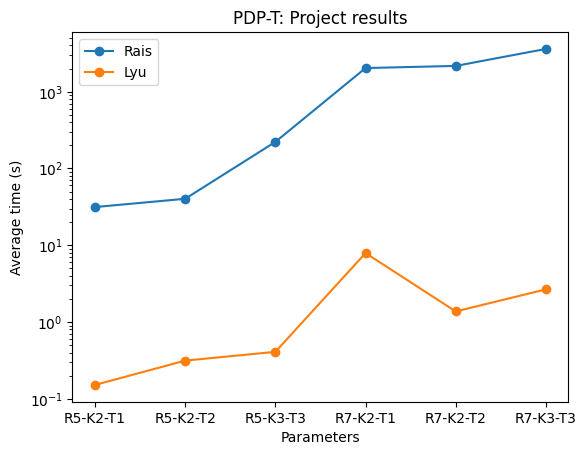

In [8]:
fig, ax = plt.subplots()

ax.plot(an.get_results_stats(df_rais)['t'], marker='o', label='Rais')
ax.plot(an.get_results_stats(df_lyu)['t'], marker='o', label='Lyu')

ax.set(title='PDP-T: Project results', 
       xlabel='Parameters', 
       ylabel='Average time (s)', yscale='log')
ax.legend()

fig.savefig('../figures/PDPT.png', dpi=300)
plt.show()

# PDPTWT - Fixed driver shift length (240)

## Paper

In [18]:
instances = utils.pick_pdptwt_instances(2, 'Sampaio', skip=['180', '300', '5T'])

In [19]:
df = pd.read_csv(utils.PDPTWT_PAPER_RESULTS_PATH, sep='\t')
df = df[df['Instance'].isin(instances)]
df['Params'] = df['Instance'].apply(lambda name: name[:13])

df_sampaio = df[df['Model'] == 'Sampaio']
df_lyu = df[df['Model'] == 'Lyu']

In [20]:
an.get_results_stats(df_sampaio)

,opt,lim,no,gap,t
Params,,,,,
3R-4K-4T-240L,2,0,0,0.000000,9.231899
3R-4K-4T-240M,2,0,0,0.000000,5.100620
3R-4K-4T-240S,2,0,0,0.000000,0.851732
4R-4K-4T-240L,2,0,0,0.000000,337.337275
4R-4K-4T-240M,2,0,0,0.000000,42.024628
4R-4K-4T-240S,2,0,0,0.000000,27.591332
5R-4K-4T-240L,0,2,0,0.149908,3600.026198
5R-4K-4T-240M,2,0,0,0.000000,1072.190763
5R-4K-4T-240S,2,0,0,0.000000,302.267466


In [21]:
an.get_results_stats(df_lyu)

,opt,lim,no,gap,t
Params,,,,,
3R-4K-4T-240L,2,0,0,0.0,5.524339
3R-4K-4T-240M,2,0,0,0.0,3.416602
3R-4K-4T-240S,2,0,0,0.0,2.195621
4R-4K-4T-240L,2,0,0,0.0,77.838708
4R-4K-4T-240M,2,0,0,0.0,26.966207
4R-4K-4T-240S,2,0,0,0.0,26.841693
5R-4K-4T-240L,2,0,0,0.0,1323.157136
5R-4K-4T-240M,2,0,0,0.0,770.505918
5R-4K-4T-240S,2,0,0,0.0,60.655713


## Project

In [2]:
df = pd.read_csv('../results/PDPTWT.csv')
df['Params'] = df['Instance'].apply(lambda name: name[:13])

df_sampaio = df[df['Model'] == 'Sampaio']
df_lyu = df[df['Model'] == 'Lyu']

In [23]:
an.get_results_stats(df_sampaio)

,opt,lim,no,gap,t
Params,,,,,
3R-4K-4T-240L,2,0,0,0.000000,12.1360
3R-4K-4T-240M,2,0,0,0.000000,7.2910
3R-4K-4T-240S,2,0,0,0.000000,2.1385
4R-4K-4T-240L,2,0,0,0.000000,267.9120
4R-4K-4T-240M,2,0,0,0.000000,190.4770
4R-4K-4T-240S,2,0,0,0.000000,47.0290
5R-4K-4T-240L,0,2,0,0.148046,3600.0485
5R-4K-4T-240M,2,0,0,0.000000,1855.2940
5R-4K-4T-240S,2,0,0,0.000000,85.3890


In [24]:
an.get_results_stats(df_lyu)

,opt,lim,no,gap,t
Params,,,,,
3R-4K-4T-240L,2,0,0,0.0,7.3060
3R-4K-4T-240M,2,0,0,0.0,4.8290
3R-4K-4T-240S,2,0,0,0.0,1.0120
4R-4K-4T-240L,2,0,0,0.0,70.4585
4R-4K-4T-240M,2,0,0,0.0,27.7265
4R-4K-4T-240S,2,0,0,0.0,36.3855
5R-4K-4T-240L,2,0,0,0.0,2653.0250
5R-4K-4T-240M,2,0,0,0.0,493.2760
5R-4K-4T-240S,2,0,0,0.0,39.1055


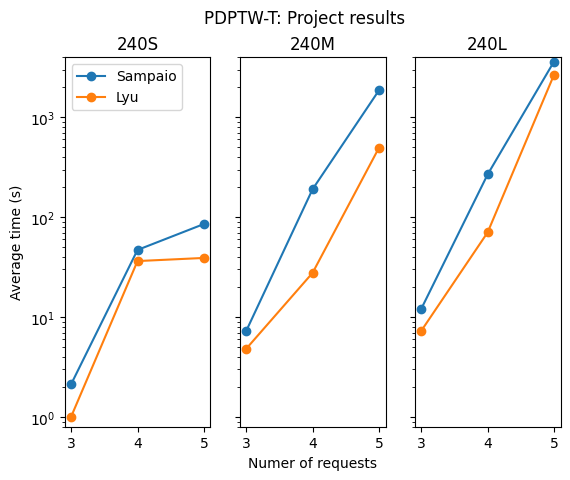

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)

time_sampaio = an.get_results_stats(df_sampaio)['t']
time_lyu = an.get_results_stats(df_lyu)['t']

params_enum = {
       0: '240S',
       1: '240M',
       2: '240L'
}

for i, ax in enumerate(axes):
       p = params_enum[i]
       ax.set_title(p)
       ax.set_yscale('log')
       ax.set_ylim(0.8, 4000)

       data = time_sampaio[time_sampaio.index.str.contains(p)]
       ax.plot([x[0] for x in data.index], data, marker='o', label='Sampaio')

       data = time_lyu[time_lyu.index.str.contains(p)]
       ax.plot([x[0] for x in data.index], data, marker='o', label='Lyu')

axes[0].set_ylabel('Average time (s)')
axes[0].legend(loc='upper left')
axes[1].set_xlabel('Numer of requests')

plt.suptitle('PDPTW-T: Project results')

fig.savefig('../figures/PDPTWT-Fixed-240.png', dpi=300)
plt.show()

# PDPTWT - Fixed request distance (M)

## Project

In [6]:
df = pd.read_csv('../results/PDPTWT-VARY-SHIFT.csv')
df['Params'] = df['Instance'].apply(lambda name: name[:13])

df_sampaio = df[df['Model'] == 'Sampaio']
df_lyu = df[df['Model'] == 'Lyu']

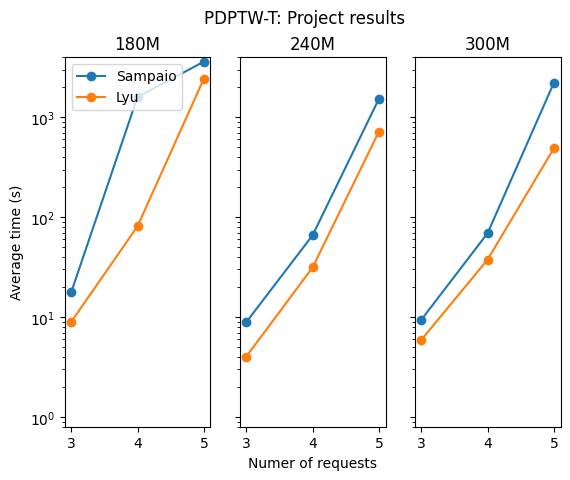

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)

time_sampaio = an.get_results_stats(df_sampaio)['t']
time_lyu = an.get_results_stats(df_lyu)['t']

params_enum = {
       0: '180M',
       1: '240M',
       2: '300M'
}

for i, ax in enumerate(axes):
       p = params_enum[i]
       ax.set_title(p)
       ax.set_yscale('log')
       ax.set_ylim(0.8, 4000)

       data = time_sampaio[time_sampaio.index.str.contains(p)]
       ax.plot([x[0] for x in data.index], data, marker='o', label='Sampaio')

       data = time_lyu[time_lyu.index.str.contains(p)]
       ax.plot([x[0] for x in data.index], data, marker='o', label='Lyu')

       if i == 0:
              ax.set_ylabel('Average time (s)')
              ax.legend(loc='upper left')

       if i == 1:
              ax.set_xlabel('Numer of requests')

plt.suptitle('PDPTW-T: Project results')

fig.savefig('../figures/PDPTWT-Fixed-M.png', dpi=300)
plt.show()

# PDPT Lyu Scalability on #requests

In [4]:
df = pd.read_csv('../results/PDPT-LYU-SCALABILITY-R.csv')
df['Params'] = df['Instance'].apply(lambda name: name.split('-')[1][1:])
df.sort_values(by='Time').reset_index(drop=True, inplace=True)

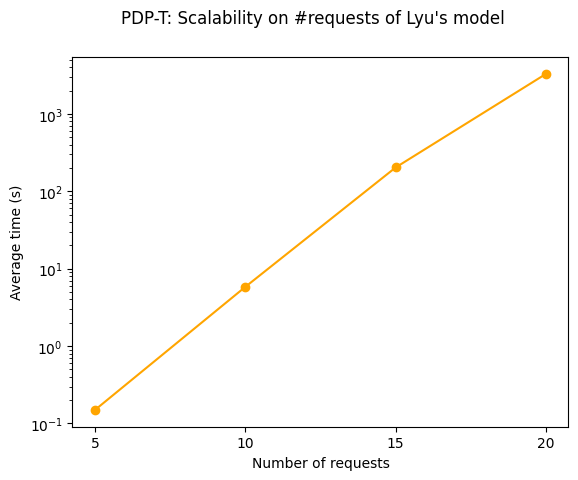

In [5]:
fig, ax = plt.subplots()

data = df.groupby('Params')['Time'].mean().sort_values()


ax.plot(data, marker='o', color='orange')
ax.set(xlabel='Number of requests',
       ylabel='Average time (s)',
       yscale='log')

plt.suptitle('PDP-T: Scalability on #requests of Lyu\'s model')
fig.savefig('../figures/PDPT-LYU-SCALABILITY-R.png', dpi=300)
plt.show()

# PDPT Lyu Scalability on #vehicles

In [2]:
df = pd.read_csv('../results/PDPT-VEHICLES.csv')
df['Params'] = df['Instance'].apply(lambda name: int(name.split('-')[2][1:]))
df = df.sort_values('Params').reset_index(drop=True)

df_lyu = df[df['Model'] == 'Lyu']
df_rais = df[df['Model'] == 'Rais']

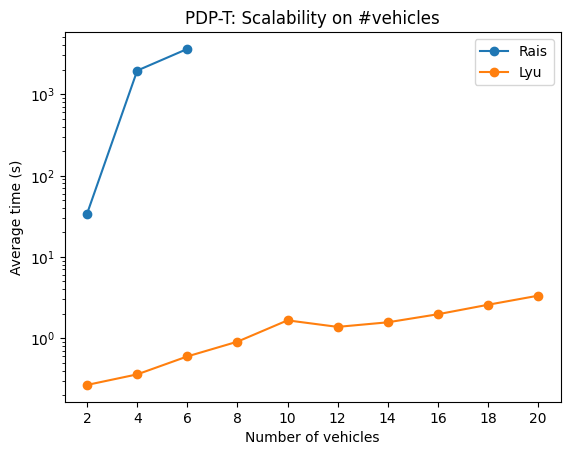

In [3]:
fig, ax = plt.subplots()

ax.plot(df_rais.groupby('Params')['Time'].mean(), marker='o', label='Rais')
ax.plot(df_lyu.groupby('Params')['Time'].mean(), marker='o', label='Lyu')

ax.set(title='PDP-T: Scalability on #vehicles',
       yscale='log', 
       ylabel='Average time (s)', 
       xlabel='Number of vehicles',
       xticks=range(2, 21, 2))
ax.legend()

fig.savefig('../figures/PDPT-SCALABILITY-V.png', dpi=300)
plt.show()

# PDPT Effect of Valid Inequalities

In [6]:
df = pd.read_csv('../results/PDPT-RAIS-WITH-VI.csv')
df = df.sort_values('Instance').reset_index(drop=True)

df_lyu = df[df['Model'] == 'Lyu']
df_lyu.set_index('Instance', inplace=True)
df_rais = df[df['Model'] == 'Rais']
df_rais.set_index('Instance', inplace=True)
df_rais_vi = df[df['Model'] == 'Rais_vi']
df_rais_vi.set_index('Instance', inplace=True)

In [31]:
df_rais.describe()

,Objective,Gap,Time
count,10.000000,10.0,10.000000
mean,442.438636,0.0,78.828400
std,81.719621,0.0,154.088246
min,315.749465,0.0,2.452000
25%,393.073988,0.0,10.438000
50%,444.803858,0.0,23.968500
75%,509.403789,0.0,35.039250
max,556.214864,0.0,503.343000


In [32]:
df_rais_vi.describe()

,Objective,Gap,Time
count,10.000000,10.0,10.000000
mean,442.438637,0.0,0.359500
std,81.719622,0.0,0.219008
min,315.749465,0.0,0.154000
25%,393.073988,0.0,0.201000
50%,444.803864,0.0,0.294000
75%,509.403789,0.0,0.448250
max,556.214864,0.0,0.865000


In [33]:
df_lyu.describe()

,Objective,Gap,Time
count,10.000000,10.0,10.000000
mean,442.438637,0.0,0.137200
std,81.719622,0.0,0.050142
min,315.749465,0.0,0.069000
25%,393.073988,0.0,0.105750
50%,444.803864,0.0,0.126000
75%,509.403789,0.0,0.171500
max,556.214864,0.0,0.236000


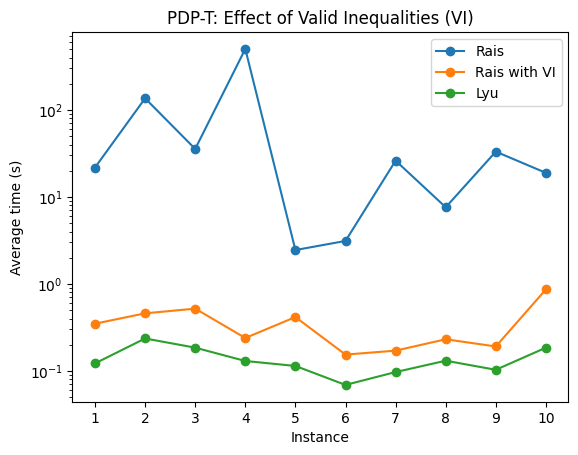

In [12]:
fig, ax = plt.subplots()

ax.set(title='PDP-T: Effect of Valid Inequalities (VI)',
       ylabel='Average time (s)',
       yscale='log',
       xlabel='Instance')

ax.plot(df_rais['Time'], marker='o', label='Rais')
ax.plot(df_rais_vi['Time'], marker='o', label='Rais with VI')
ax.plot(df_lyu['Time'], marker='o', label='Lyu')

ax.set_xticks(range(0, 10), range(1, 11))
ax.legend()

fig.savefig('../figures/PDPT-ValidInequalities.png', dpi=300)
plt.show()

# PDPTWT Effect of Valid Inequalities

In [18]:
df = pd.read_csv('../results/PDPTWT-VI.csv')
df = df.sort_values('Instance').reset_index(drop=True)

df_lyu = df[df['Model'] == 'Lyu']
df_lyu.set_index('Instance', inplace=True)
df_sampaio = df[df['Model'] == 'Sampaio']
df_sampaio.set_index('Instance', inplace=True)
df_sampaio_vi = df[df['Model'] == 'Sampaio_vi']
df_sampaio_vi.set_index('Instance', inplace=True)

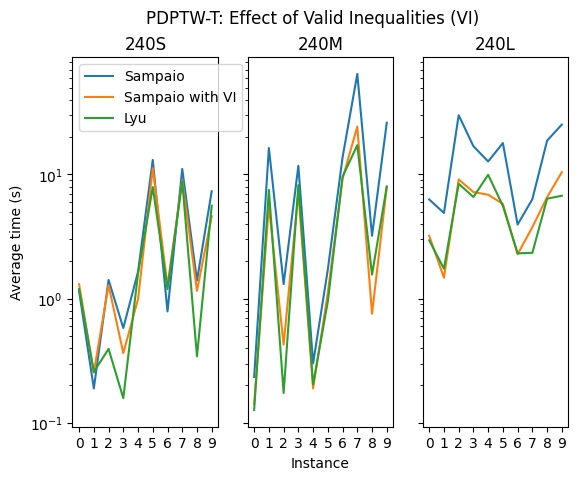

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)

params_enum = {
       0: '240S',
       1: '240M',
       2: '240L'
}

for i, ax in enumerate(axes):
       p = params_enum[i]
       ax.set_title(p)
       ax.set_yscale('log')

       data = df_sampaio[df_sampaio.index.str.contains(p)]['Time']
       data.sort_index(inplace=True)
       ax.plot([x[-5] for x in data.index], data, label='Sampaio')

       data = df_sampaio_vi[df_sampaio_vi.index.str.contains(p)]['Time']
       data.sort_index(inplace=True)
       ax.plot([x[-5] for x in data.index], data, label='Sampaio with VI')
       
       data = df_lyu[df_lyu.index.str.contains(p)]['Time']
       data.sort_index(inplace=True)
       ax.plot([x[-5] for x in data.index], data, label='Lyu')
       
axes[0].set_ylabel('Average time (s)')
axes[0].legend(loc='upper left')
axes[1].set_xlabel('Instance')

plt.suptitle('PDPTW-T: Effect of Valid Inequalities (VI)')

fig.savefig('../figures/PDPTWT-ValidInequalities.png', dpi=300)
plt.show()

In [37]:
df_sampaio.describe()

,Objective,Gap,Time
count,30.000000,30.0,30.000000
mean,309.342448,0.0,10.696900
std,69.424150,0.0,13.335298
min,180.120066,0.0,0.189000
25%,270.979493,0.0,1.403750
50%,301.286393,0.0,6.309000
75%,340.782738,0.0,15.690750
max,456.295518,0.0,64.547000


In [38]:
df_sampaio_vi.describe()

,Objective,Gap,Time
count,30.000000,3.000000e+01,30.000000
mean,309.342540,3.899644e-07,4.837700
std,69.424051,2.135923e-06,5.116096
min,180.120066,0.000000e+00,0.142000
25%,270.979493,0.000000e+00,1.126750
50%,301.286393,0.000000e+00,3.486500
75%,340.782738,0.000000e+00,7.210500
max,456.295518,1.169893e-05,24.320000


In [39]:
df_lyu.describe()

,Objective,Gap,Time
count,30.000000,30.0,30.000000
mean,309.342448,0.0,4.468467
std,69.424150,0.0,4.202520
min,180.120066,0.0,0.127000
25%,270.979493,0.0,1.008500
50%,301.286393,0.0,2.644000
75%,340.782738,0.0,7.811750
max,456.295518,0.0,17.231000
